In [1]:
# Carga de algunas librerias de data science habituales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definición de que campos componen el dataset, de esta manera carga más rápido  

diclist = {"product_id": object,"store_id": object,"date": object, "sales":float, "revenue": float, "stock":float, "price":float,"promo_type_1":object, "promo_bin_1":object,"promo_type_2":object, "promo_bin_2":object, "promo_discount_2":object, "promo_discount_type_2": object }

In [3]:
# Lectura del archivo y creación del dataframe que se va a manipular
# Cambie localmente la ruta del archivo sales que mas le convenga, en este caso.
# aquí se usa "Downloads/sales.csv"

df = pd.read_csv("Downloads/sales.csv", dtype= diclist, sep= ",")
df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [4]:
# Conversión del campo fecha para que se reconozca como un dato tipo datetime

df['date'] =  pd.to_datetime(df['date'])

In [5]:
df[df.date < '2019-11-01']  # última fecha sin datos en revenue, stock y sales

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264071,P0748,S0125,2019-10-31,0.0,0.00,11.0,18.90,PR14,NaN,PR03,NaN,NaN,NaN
18264072,P0748,S0126,2019-10-31,0.0,0.00,4.0,18.90,PR14,NaN,PR03,NaN,NaN,NaN
18264073,P0748,S0131,2019-10-31,0.0,0.00,6.0,18.90,PR14,NaN,PR03,NaN,NaN,NaN
18264074,P0748,S0132,2019-10-31,0.0,0.00,2.0,18.90,PR14,NaN,PR03,NaN,NaN,NaN


In [6]:
df[df.date > '2019-10-31']  # primera fecha sin datos en revenue, stock y sales

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
18264076,P0001,S0001,2019-11-01,NaN,NaN,NaN,10.95,PR14,NaN,PR03,NaN,NaN,NaN
18264077,P0001,S0002,2019-11-01,NaN,NaN,NaN,10.95,PR14,NaN,PR03,NaN,NaN,NaN
18264078,P0001,S0020,2019-11-01,NaN,NaN,NaN,10.95,PR14,NaN,PR03,NaN,NaN,NaN
18264079,P0001,S0023,2019-11-01,NaN,NaN,NaN,10.95,PR14,NaN,PR03,NaN,NaN,NaN
18264080,P0001,S0038,2019-11-01,NaN,NaN,NaN,10.95,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19454833,P0748,S0125,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,NaN,NaN,NaN
19454834,P0748,S0126,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,NaN,NaN,NaN
19454835,P0748,S0131,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,NaN,NaN,NaN
19454836,P0748,S0132,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,NaN,NaN,NaN


In [7]:
# Se establecen las fechas como index y se ordenan

df = df.set_index('date')
df = df.sort_index()

In [8]:
# Elimina la distinción de tienda que no se va tener en cuenta, sino cantidad
# total de la empresa

df = df.drop(columns=['store_id'])
df.head()

,product_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,
2017-01-02,P0001,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [9]:
# Filtra el producto deseado, en este caso el más repetido

data = df[df['product_id'] == 'P0125']
data.head()

,product_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,
2017-01-02,P0125,0.0,0.0,22.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,58.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,15.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,42.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,44.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN


In [10]:
# Crea una frecuencia semanal para la serie temporal y coge la suma semanal 

data2 = data.resample('W').sum()
data2

,sales,revenue,stock,price
date,,,,
2017-01-08,376.0,994.58,34793.0,2082.95
2017-01-15,454.0,1217.27,36603.0,2159.55
2017-01-22,493.0,1349.65,38272.0,2197.75
2017-01-29,543.0,1480.31,38744.0,2209.55
2017-02-05,490.0,1338.00,37880.0,2174.15
...,...,...,...,...
2019-12-01,0.0,0.00,0.0,3427.75
2019-12-08,0.0,0.00,0.0,3441.15
2019-12-15,0.0,0.00,0.0,3446.10


Text(0.5, 1.0, 'Grafico de ganancias')

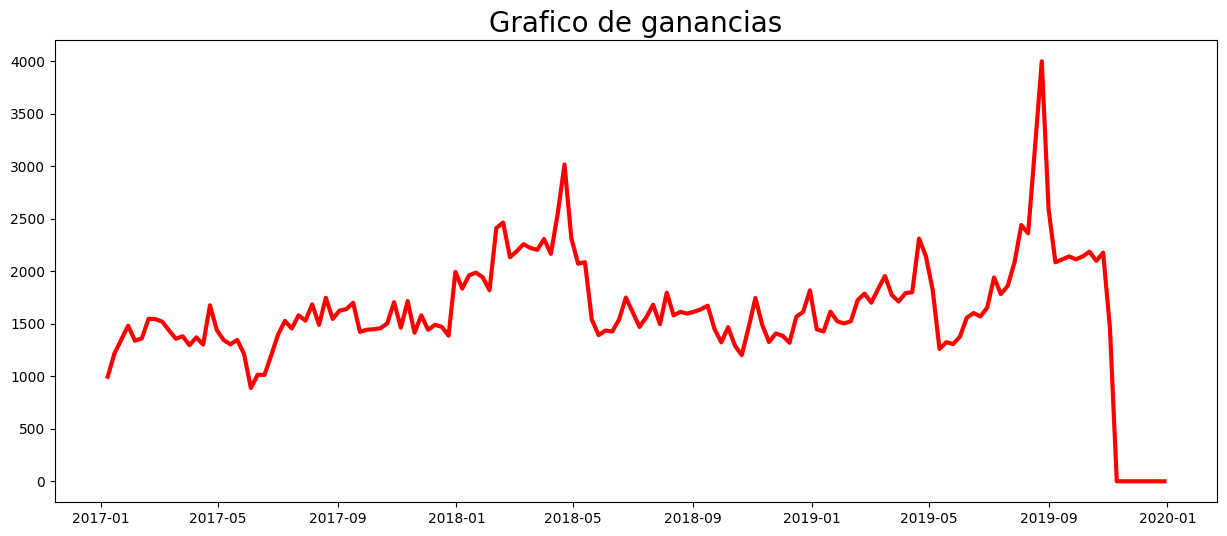

In [11]:
# Genera la gráfica de ganacias hasta la última fecha con dato

plt.figure(figsize=(15,6))
plt.plot(data2.revenue, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

In [12]:
# Crea la variable con que contiene solo las ganancias hasta la última fecha
# con dato

data3 = data2.revenue.loc[:'2019-11-03']
data3

date
2017-01-08     994.58
2017-01-15    1217.27
2017-01-22    1349.65
2017-01-29    1480.31
2017-02-05    1338.00
               ...   
2019-10-06    2139.97
2019-10-13    2185.91
2019-10-20    2097.94
2019-10-27    2176.15
2019-11-03    1455.65
Freq: W-SUN, Name: revenue, Length: 148, dtype: float64

Text(0.5, 1.0, 'Grafico de ganancias')

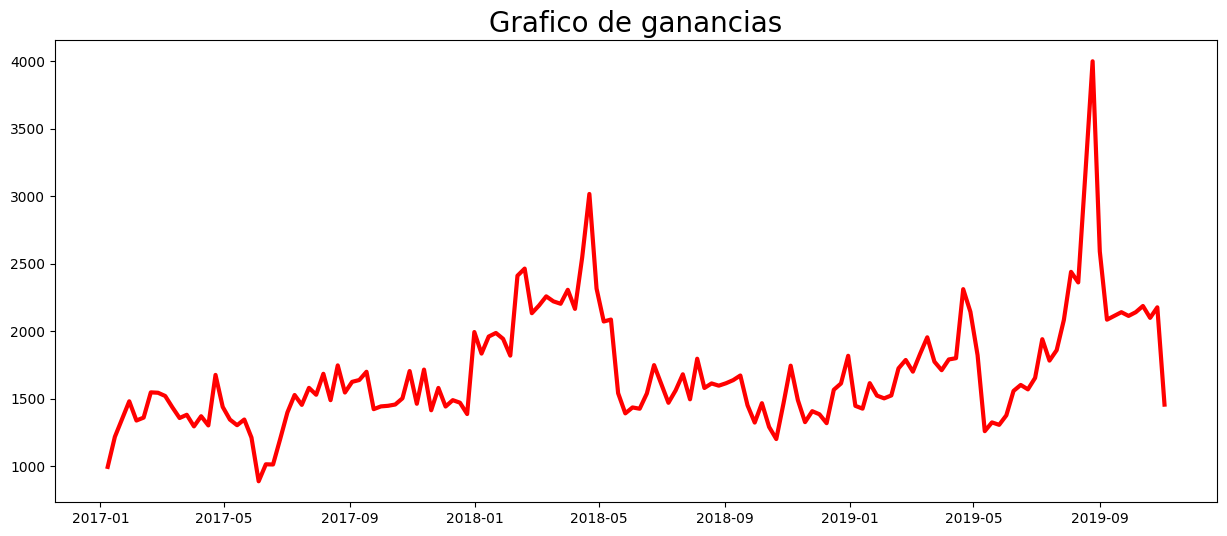

In [13]:
# Genera la gráfica de ganacias hasta la última fecha con dato

plt.figure(figsize=(15,6))
plt.plot(data3, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

Text(0.5, 1.0, 'Grafico de ganancias')

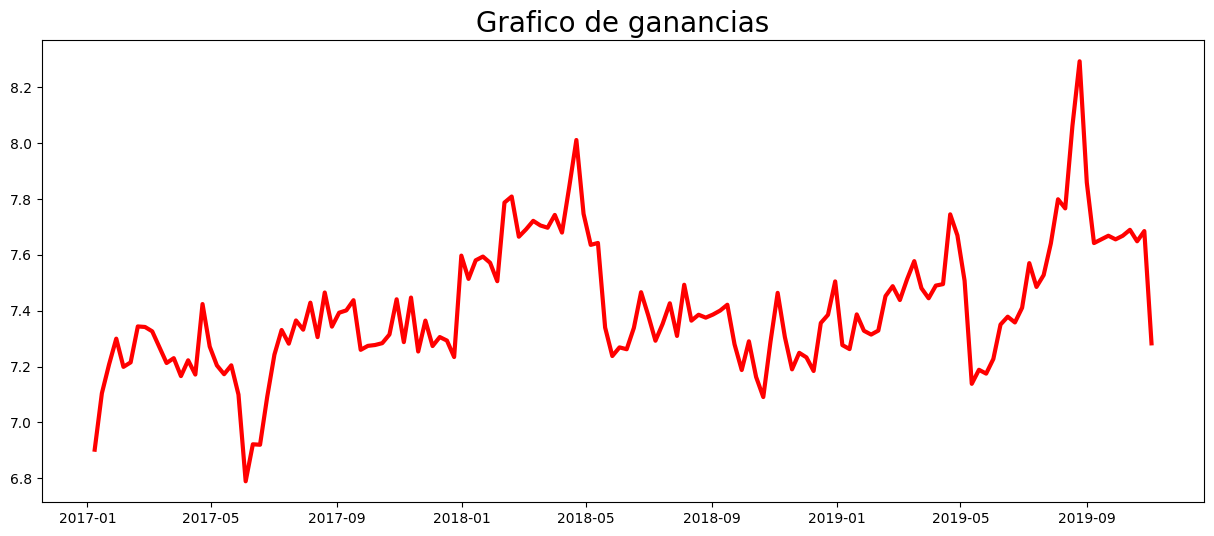

In [14]:
# Se aplica una transformación logarítmica a la serie temporal 

data3_log = np.log(data3)

plt.figure(figsize=(15,6))
plt.plot(data3_log, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

Text(0.5, 1.0, 'Grafico de ganancias')

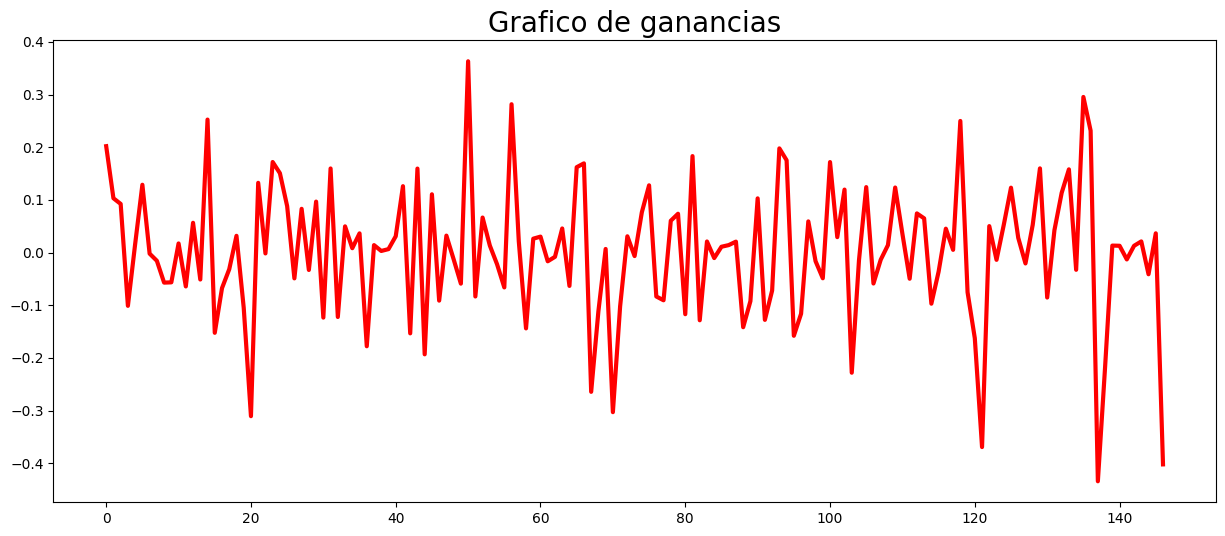

In [15]:
# Diferenciación para estabilizar la media, se puede observar ahora que está en 0

data3_diff = np.diff(data3_log)

plt.figure(figsize=(15,6))
plt.plot(data3_diff, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

In [16]:
# Serie diferenciada

data3_diff

array([ 0.20204539,  0.10323465,  0.09240623, -0.10107556,  0.01605871,
        0.12878551, -0.00196761, -0.01556594, -0.05700127, -0.05648167,
        0.01736238, -0.06421837,  0.05656085, -0.05109122,  0.25255398,
       -0.15227848, -0.06746165, -0.0315547 ,  0.03182974, -0.10474792,
       -0.31056168,  0.1324471 , -0.00157925,  0.17199686,  0.15070977,
        0.08821603, -0.04893066,  0.08309875, -0.03296369,  0.0967982 ,
       -0.12342083,  0.15974182, -0.12222794,  0.04981265,  0.00834393,
        0.03654751, -0.17781003,  0.01420088,  0.00310091,  0.00661946,
        0.03099902,  0.12609256, -0.15332275,  0.15952867, -0.19314277,
        0.11069723, -0.09118951,  0.03220988, -0.01268082, -0.05892543,
        0.36325177, -0.08331834,  0.06653972,  0.01341111, -0.02219027,
       -0.06610667,  0.281696  ,  0.02162706, -0.14388577,  0.02642143,
        0.03032818, -0.01651409, -0.00801761,  0.0457993 , -0.06325358,
        0.16213931,  0.16945402, -0.26433175, -0.11128586,  0.00

In [17]:
# Tamaño de la serie difrenciada

len(data3_diff)

147

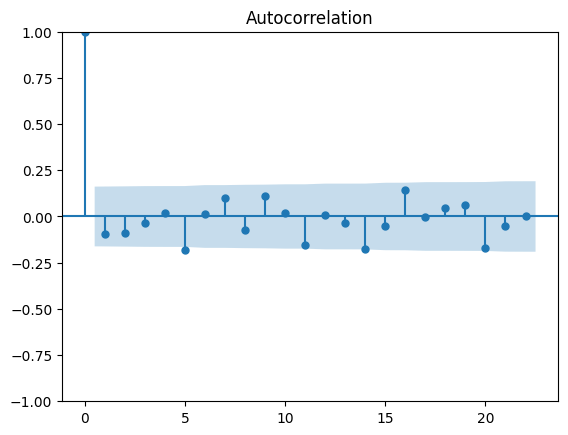

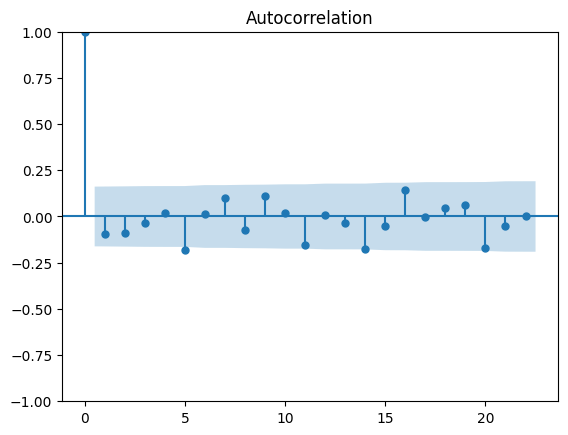

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Grafico de correlación de la serie temporal, parecer llegar a estar totalmente correlacionado

plot_acf(data3_diff)       # Se ve claramente que solo hay que diferenciar una vez

Como se puede observar en la gráfica de autocorrelación de arriba los valores
parecen mantenerse la serie dentro del filtro, indicando una buena diferenciación.

Como se puede observar el valor recae después de diferenciar por segunda vez la
serie temporal, ahora a continuación con la correlación parcial se verá
que valor debería de tener p.

In [19]:
# Crea el modelo ARIMA 

from statsmodels.tsa.arima.model import ARIMA
                                
data_train = data3_diff[:103]    # datos de entrenamiento ya con logaritmo y después diferenciados

arima_model = ARIMA(data_train, order=(1,0,0),seasonal_order=(0, 1, 0, 52))     # orden de variables es AR = 1,D = 1,s = 2 
model = arima_model.fit()
print(model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  103
Model:             ARIMA(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                  28.693
Date:                          Sat, 04 Feb 2023   AIC                            -53.385
Time:                                  16:09:03   BIC                            -49.522
Sample:                                       0   HQIC                           -51.909
                                          - 103                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2680      0.157     -1.711      0.087      -0.575       0.039
sigma2         0.0190      0.003      5.549      0.

In [20]:
data_test = data3_diff[103:]    # Conjunto de test de la serie transformada 

y_pred = pd.Series(model.forecast(44))   # Generación de previsionesdata
y_true = data_test                       # Valor real

tabla = pd.DataFrame({'y_pred':y_pred ,'y_true':y_true})        # Dataframe con una columna para valor real y otra para la previsión
tabla

,y_pred,y_true
0,-0.018023,-0.228071
1,0.049040,-0.014392
2,0.018101,0.124320
3,-0.023447,-0.058665
4,-0.065770,-0.013614
5,0.281606,0.014218
6,0.021651,0.123542
7,-0.143892,0.035534
8,0.026423,-0.049618
9,0.030328,0.074377


In [21]:
# Generación de medidas del modelo

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [22]:
print('eL MSE es',mse)
print('el RMSE es' ,rmse)
print('el R2 es',np.abs(r2))

eL MSE es 0.03582208185840339
el RMSE es 0.1892672234128334
el R2 es 0.6029006052894441


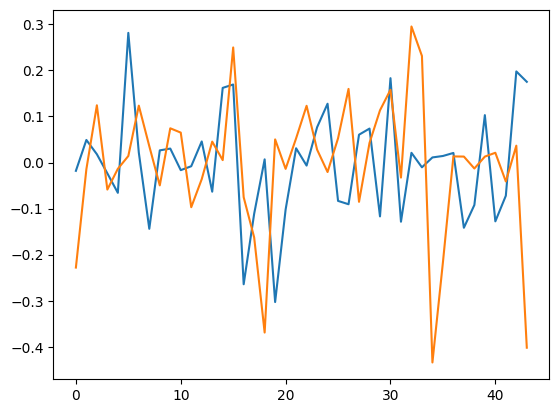

In [23]:
# Aqui se ve que se ajustan las predicciones a la realidad luego
# se puede hacer de predicciones válidas de cara al futuro
# y hacer una previsión real

plt.plot(tabla ['y_pred'])
plt.plot(tabla ['y_true'])
plt.show()

In [24]:
# Se revierten todas las trasformaciones en la predicción, tanto logaritmica
# como diferenciación, esta última tantas veces como haya sido diferenciada

temp =data3_log[0]
y_pred_sum = np.cumsum(y_pred) + temp
prediction = np.exp(y_pred_sum)
prediction.index = pd.date_range(start=data3_log.index[104], periods=44, freq='W')
prediction

2019-01-06     976.815676
2019-01-13    1025.912622
2019-01-20    1044.651981
2019-01-27    1020.442686
2019-02-03     955.487831
2019-02-10    1266.266061
2019-02-17    1293.981263
2019-02-24    1120.563251
2019-03-03    1150.566734
2019-03-10    1185.995314
2019-03-17    1166.570657
2019-03-24    1157.254909
2019-03-31    1211.488847
2019-04-07    1137.231132
2019-04-14    1337.411176
2019-04-21    1584.374681
2019-04-28    1216.354240
2019-05-05    1088.251413
2019-05-12    1095.785946
2019-05-19     809.384361
2019-05-26     730.839216
2019-06-02     753.847390
2019-06-09     748.882164
2019-06-16     808.459620
2019-06-23     918.593059
2019-06-30     845.170767
2019-07-07     771.995422
2019-07-14     820.113452
2019-07-21     882.874958
2019-07-28     785.425176
2019-08-04     943.356138
2019-08-11     829.602551
2019-08-18     847.309229
2019-08-25     838.560974
2019-09-01     847.923971
2019-09-08     860.082207
2019-09-15     878.182951
2019-09-22     762.206834
2019-09-29  

In [25]:
len(prediction)

44

Text(0.5, 1.0, 'Grafico de ganancias')

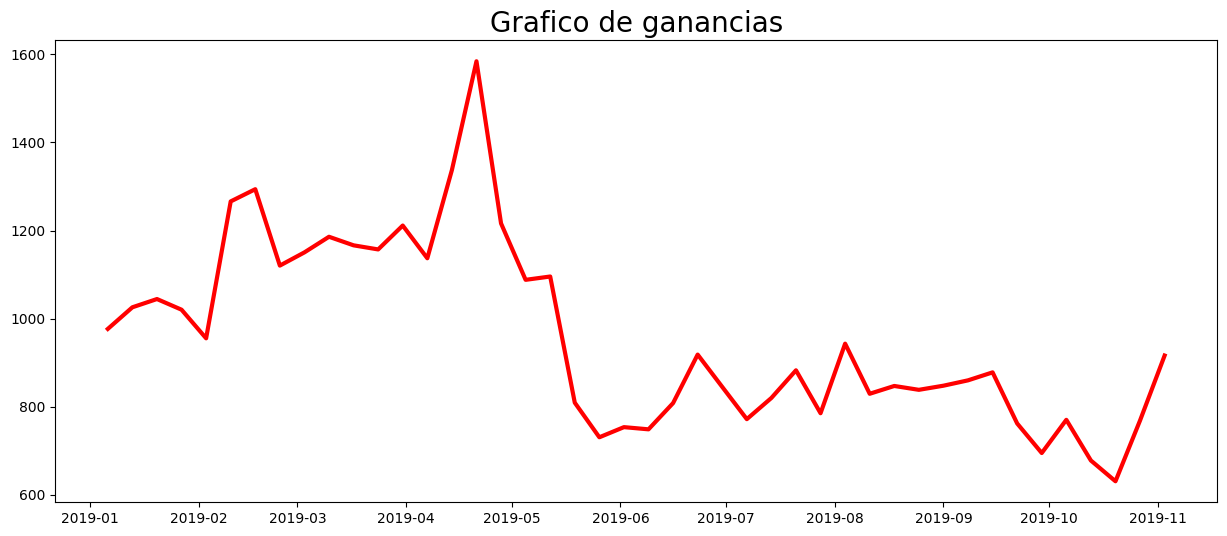

In [26]:
plt.figure(figsize=(15,6))
plt.plot(prediction, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)